0. Colab Setup

In [1]:
!pip -q install scikit-learn pandas matplotlib seaborn


1. Imports & Reproducibility

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


2. Load Dataset (Iris)

In [3]:
iris = load_iris(as_frame=True)
df = iris.frame

# Inspect first rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


3. Preprocessing

In [4]:
# Features & target
X = df.drop(columns=["target"])
y = df["target"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Scaling features (important for KNN & Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


4. Train Multiple Models

In [5]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    "Decision Tree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

# Train & evaluate
for name, model in models.items():
    if name == "Decision Tree":  # tree does not require scaling
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, preds)
    results[name] = {"model": model, "accuracy": acc, "preds": preds}

results


{'Logistic Regression': {'model': LogisticRegression(max_iter=1000, random_state=42),
  'accuracy': 0.9333333333333333,
  'preds': array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
         1, 1, 2, 2, 1, 0, 2, 0])},
 'Decision Tree': {'model': DecisionTreeClassifier(random_state=42),
  'accuracy': 0.9333333333333333,
  'preds': array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
         1, 1, 2, 2, 1, 0, 2, 0])},
 'KNN': {'model': KNeighborsClassifier(),
  'accuracy': 0.9333333333333333,
  'preds': array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
         1, 1, 2, 1, 1, 0, 2, 0])}}

5. Compare Accuracies

In [6]:
for name, res in results.items():
    print(f"{name} Accuracy: {res['accuracy']:.4f}")


Logistic Regression Accuracy: 0.9333
Decision Tree Accuracy: 0.9333
KNN Accuracy: 0.9333


6. Confusion Matrix & Classification Report

Best Model: Logistic Regression

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



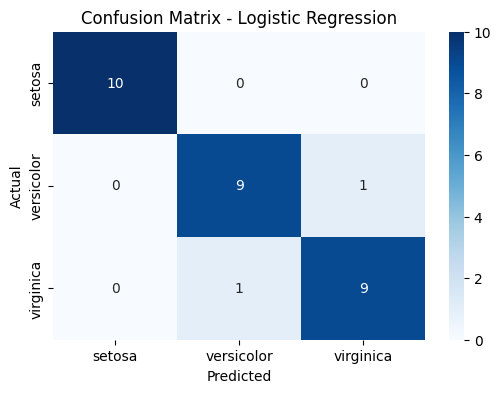

In [7]:
# Choose best model by accuracy
best_model_name = max(results, key=lambda k: results[k]["accuracy"])
best_preds = results[best_model_name]["preds"]

print(f"Best Model: {best_model_name}\n")
print("Classification Report:\n", classification_report(y_test, best_preds, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, best_preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


7. Visualization: Decision Boundaries

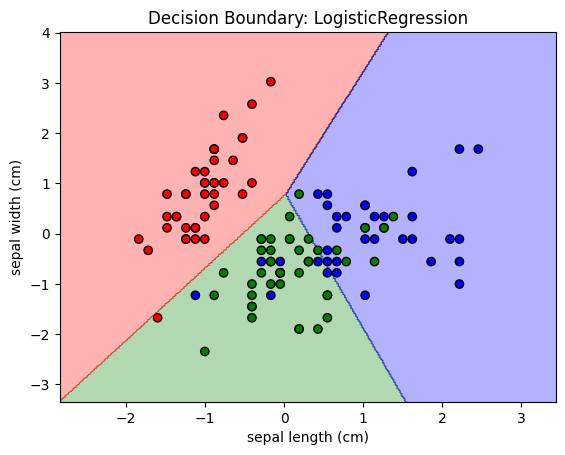

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, features=[0,1], scaled=True):
    X = X.iloc[:, features].values
    y = y.values

    if scaled:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    model.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red','green','blue')))
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap=ListedColormap(('red','green','blue')))
    plt.xlabel(iris.feature_names[features[0]])
    plt.ylabel(iris.feature_names[features[1]])
    plt.title(f"Decision Boundary: {model.__class__.__name__}")
    plt.show()

# Example with Logistic Regression on first 2 features
plot_decision_boundary(
    X_train.iloc[:,:2],
    y_train,
    LogisticRegression(max_iter=1000),
    scaled=True
)


8. Save Best Model

In [12]:
import joblib

joblib.dump(results[best_model_name]["model"], "best_classification_model.joblib")
print("Model saved as best_classification_model.joblib")


Model saved as best_classification_model.joblib


9. Quick Prediction

In [13]:
# Example prediction (using Logistic Regression)
sample = [[5.1, 3.5, 1.4, 0.2]]  # typical setosa
sample_scaled = scaler.transform(sample)
pred = results["Logistic Regression"]["model"].predict(sample_scaled)
print("Predicted class:", iris.target_names[pred[0]])


Predicted class: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


10. Gradio App Interface

In [15]:
# ✅ Ensure imports
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load dataset again (in case previous cells weren’t run)
iris = load_iris(as_frame=True)
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

# Train + evaluate
comparison = []
for name, clf in models.items():
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    comparison.append({"Model": name, "Accuracy": acc})

comparison_df = pd.DataFrame(comparison)

# Pick best model
best_model_name = comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]
joblib.dump(best_model, "best_classification_model.joblib")

# Reload best model
model = joblib.load("best_classification_model.joblib")

# === Gradio Functions ===
def classify_iris(sepal_length, sepal_width, petal_length, petal_width):
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                              columns=iris.feature_names)
    pred = model.predict(scaler.transform(input_data))[0]
    return f"🌸 Predicted Class: {iris.target_names[pred]}"

def plot_confusion():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=iris.target_names, yticklabels=iris.target_names, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title("Confusion Matrix")
    return fig

def get_classification_report():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)
    return pd.DataFrame(report).transpose()

# === Gradio Interface ===
with gr.Blocks() as demo:
    gr.Markdown("# 🌼 Iris Classification with Multiple Models")
    gr.Markdown(f"**Best Model Selected:** {best_model_name}")

    with gr.Tab("🔮 Predict"):
        with gr.Row():
            sepal_length = gr.Number(label="Sepal Length (cm)")
            sepal_width = gr.Number(label="Sepal Width (cm)")
            petal_length = gr.Number(label="Petal Length (cm)")
            petal_width = gr.Number(label="Petal Width (cm)")
        output = gr.Textbox(label="Prediction")
        btn = gr.Button("Classify")
        btn.click(classify_iris, [sepal_length, sepal_width, petal_length, petal_width], output)

    with gr.Tab("📊 Confusion Matrix"):
        cm_plot = gr.Plot()
        btn2 = gr.Button("Show Confusion Matrix")
        btn2.click(plot_confusion, outputs=cm_plot)

    with gr.Tab("📝 Classification Report"):
        report_out = gr.DataFrame()
        btn3 = gr.Button("Generate Report")
        btn3.click(get_classification_report, outputs=report_out)

    with gr.Tab("📈 Model Comparison"):
        gr.DataFrame(comparison_df)

# Launch app
demo.launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a18747981b90000e60.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a18747981b90000e60.gradio.live
